# 2D和3D卷积
refs: 

https://www.zhihu.com/question/266352189

https://blog.csdn.net/qq_32431103/article/details/101054181

https://www.pianshen.com/article/44531017861/

https://www.zhihu.com/question/266352189?sort=created

https://www.jianshu.com/p/1bb8618dd7ae

https://blog.csdn.net/weixin_32701893/article/details/112669259

https://www.cnblogs.com/cloud-ken/p/9356377.html



## 2D卷积
2D卷积操作如图1所示，为了解释的更清楚，分别展示了**单通道**和**多通道**的操作。且为了画图方便，**假定只有1个filter**，即输出图像只有一个chanel。其中，针对单通道，输入图像的channel为1，即**输入大小为(1, height, weight)**，**卷积核尺寸为(1, k_h, k_w)**，卷积核在输入图像上的的**空间维度（即(height, width)两维）上进行进行滑窗操作**，每次滑窗和 (k_h, k_w) 窗口内的values进行卷积操作（现在都用相关操作取代），得到输出图像中的一个value。针对多通道，假定输入图像的channel为3，即**输入大小为(3, height, weight)**，卷积核尺寸为 (3, k_h, k_w)， 卷积核在输入图像上的的空间维度（即(height, width)两维）上进行进行滑窗操作，每次滑窗与3个channels上的 (k_h, k_w) 窗口内的所有的values进行相关操作，得到输出图像中的一个value。
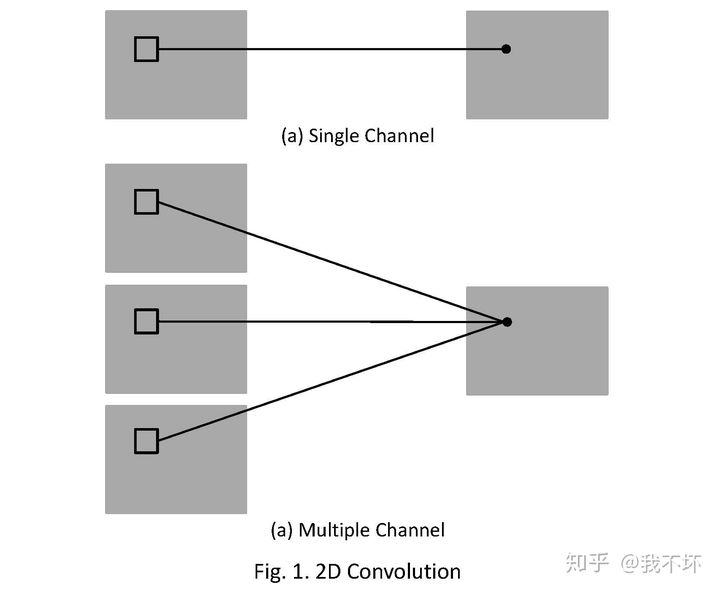

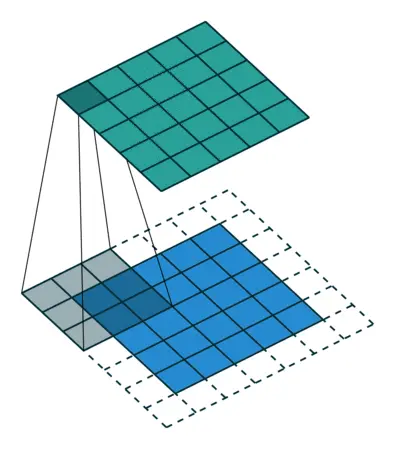

In [2]:
import torch
a = torch.ones(size=(1, 3, 5, 5))  # (B, C, H, W)
print(f'a: {a.shape}')

cnn2d = torch.nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1)
print(f'cnn2d: {cnn2d}')
# print(f'cnn: {help(cnn)}')
print(f'weight: {cnn2d.weight.data.shape}')

a1 = cnn2d(a)
print(f'a1: {a1.shape}')

a: torch.Size([1, 3, 5, 5])
cnn2d: Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
weight: torch.Size([1, 3, 3, 3])
a1: torch.Size([1, 1, 5, 5])


## 3D 卷积
3D卷积操作如图2所示，同样分为**单通道**和**多通道**，且**只使用一个filter**，输出一个channel。其中，针对单通道，与2D卷积不同之处在于，**输入图像多了一个 depth 维度**，故**输入大小为(1, depth, height, width)**，**卷积核也多了一个k_d维度**，因此卷积核在输入3D图像的**空间维度（height和width维）和depth维度**上均进行滑窗操作，每次滑窗与 (k_d, k_h, k_w) 窗口内的values进行相关操作，得到输出3D图像中的一个value.针对多通道，**输入大小为(3, depth, height, width)**，则与2D卷积的操作一样，每次滑窗与3个channels上的 (k_d, k_h, k_w) 窗口内的所有values进行相关操作，得到输出3D图像中的一个value。
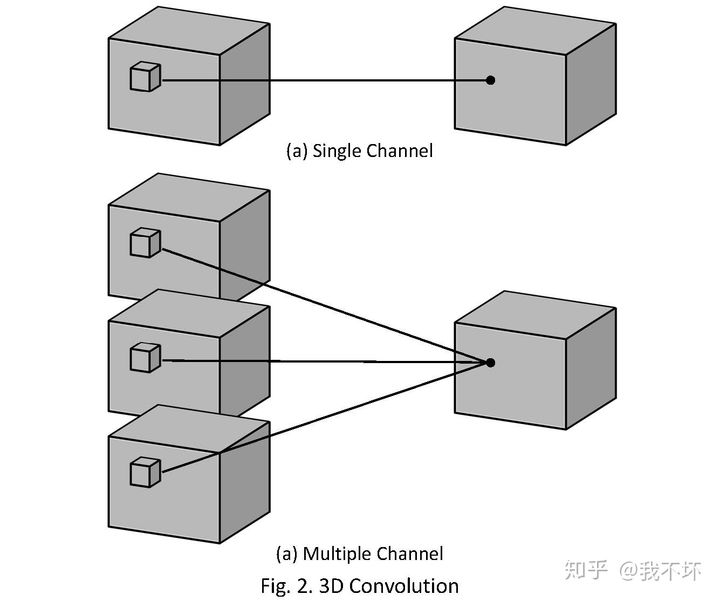

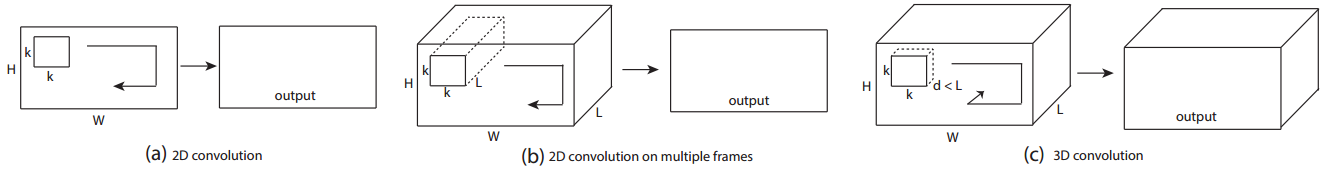

In [3]:
import torch
a = torch.ones(size=(1, 3, 2, 5, 5))  # pytorch中格式为: (B, C, D, H, W)
print(f'a: {a.shape}')

cnn3d = torch.nn.Conv3d(in_channels=3, out_channels=1, kernel_size=3, padding=1)
print(f'cnn3d: {cnn3d}')
# print(f'cnn3d: {help(cnn3d)}')
print(f'weight: {cnn3d.weight.data.shape}')

a1 = cnn3d(a)
print(f'a1: {a1.shape}')

a: torch.Size([1, 3, 2, 5, 5])
cnn3d: Conv3d(3, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
weight: torch.Size([1, 3, 3, 3, 3])
a1: torch.Size([1, 1, 2, 5, 5])
